In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:
url = 'https://raw.githubusercontent.com/esnt/Data/refs/heads/main/CleanData/superhero_clean.csv'
df = pd.read_csv(url)

In [26]:
df.head()

,name,alignment,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,A-Bomb,Good,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Aa,Good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aaron Cash,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aayla Secura,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
y = df['alignment']
X = df.drop(['name','alignment'], axis=1)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=23)

In [30]:
knn = KNeighborsClassifier(n_neighbors=50)

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [32]:
y_pred = knn.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.549618320610687

In [34]:
confusion_matrix(y_test, y_pred)

array([[  2,  84,   0],
       [  5, 142,   0],
       [  1,  28,   0]])

In [35]:
y_test.value_counts()

alignment
Good       147
Bad         86
Neutral     29
Name: count, dtype: int64

In [36]:
147/(147+86+29)

0.5610687022900763

In [40]:
train_acc = []
test_acc = []
ks = np.arange(1,50,2)
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    model.fit(X_train, y_train)
    yhat_train = model.predict(X_train)
    yhat_test = model.predict(X_test)
    train_acc.append(1-accuracy_score(y_train, yhat_train))
    test_acc.append(1-accuracy_score(y_test, yhat_test))
    

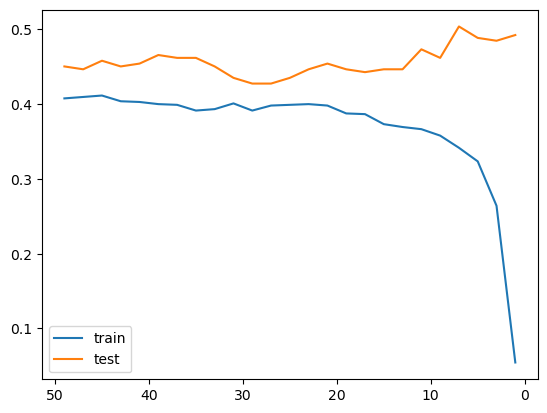

In [41]:
fig, ax = plt.subplots()
ax.plot(ks, train_acc, label='train')
ax.plot(ks, test_acc, label='test')
ax.invert_xaxis()
ax.legend()